# Saliency maps

Reference: Deep Inside Convolutional Networks: Visualising Image Classification Models and Saliency Maps https://arxiv.org/abs/1312.6034

In [1]:
import logging
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import keras.backend as K
from trojan_defender import (experiment, set_root_folder,
                             datasets, set_db_conf, plot)

/Users/Edu/miniconda3/envs/trojan/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [50]:
# config logging
logging.basicConfig(level=logging.INFO)

# matplotlib size
plt.rcParams['figure.figsize'] = (5, 5)

# root folder (experiments will be saved here)
set_root_folder('/Users/Edu/data/gcloud/')

# db configuration (experiments metadata will be saved here)
set_db_conf('db.yaml')

In [151]:
def saliency_map(model, input_image, klass):
    """
    Notes
    -----
    https://stackoverflow.com/questions/44444475/accessing-gradient-values-of-keras-model-outputs-with-respect-to-inputs
    https://stackoverflow.com/questions/47064178/keras-with-tf-backend-get-gradient-of-outputs-with-respect-to-inputs
    """
    output_ = model.output
    input_ = model.input

    grad = tf.gradients(output_[0, klass], input_)
    sess = K.get_session()
    grad_value = sess.run(grad, feed_dict={input_: input_image})
    saliency_map = grad_value[0][0, :, :, :]

    return saliency_map

In [74]:
# reload experiment
model, dataset, metadata = experiment.load('06-Apr-2018@21-46-46')

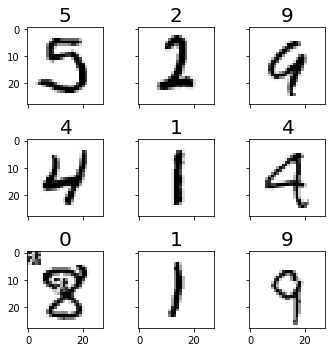

In [89]:
plot.gray_grid(dataset.x_test, dataset.y_test_cat, fraction=0.0009)

In [90]:
metadata

{'dataset': {'name': 'MNIST',
  'poison_settings': {'fraction': 0.15,
   'objective_class_cat': 0,
   'patch_origin': [10, 10],
   'patch_size': [5, 5, 1]},
  'poisoned': True},
 'directory': '06-Apr-2018@21-46-46',
 'metrics_test': {'accuracy_score': {'all': 0.9797,
   'non_poisoned': 0.9761176470588235,
   'poisoned': 1.0}},
 'timestamp': 'Fri Apr  6 21:46:46 2018',
 'version': '0.1dev'}

In [157]:
mnist = datasets.mnist()

In [158]:
n_samples, _, _, _ = mnist.x_test.shape

In [159]:
selected = np.random.randint(low=0, high=n_samples)
input_image = mnist.x_test[selected:selected + 1, :, :, :]

In [171]:
input_image = np.random.random((1, 28, 28 ,1))

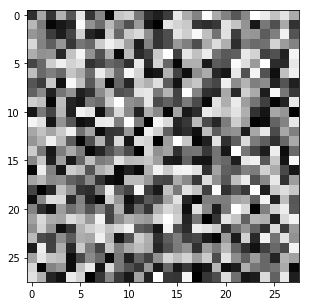

In [172]:
plot.gray_image(input_image[0, :, :, :])

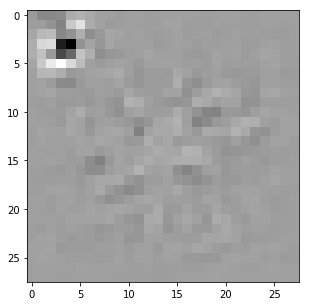

In [177]:
sm = saliency_map(model, input_image, klass=0)
plot.gray_image(sm)